In [1]:
## Params and loading packages

## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']
tss_annotation=doc['tss_annotation']



import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
#%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
from cycler import cycler
from Modules.Homer import *

%matplotlib inline

print('Number of tissues: ',len(tissues))

sns.set_style("whitegrid", {'axes.grid' : False})
### Till here

('Number of tissues: ', 16)


## Distance to TSS

In [2]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

## -1kb:+100

In [3]:
txn_pd = pickle.load(open("Results/txn_df.p",'rb'))

In [4]:
anno_peaks = pd.read_csv('Results/peaks_with_tss_and_gene.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

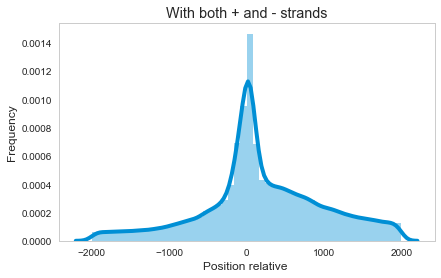

In [5]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')
plt.savefig("Results/Figures/Distance_to_TSS_neg_included.png")

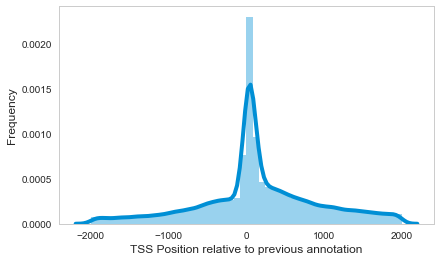

In [6]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS.png",bbox_inches='tight')

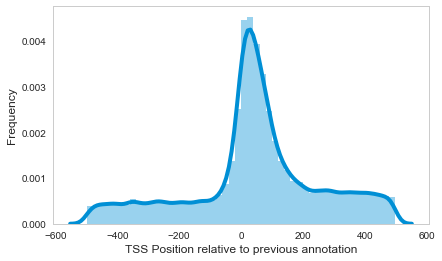

In [7]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_500.png",bbox_inches='tight')

### Look at ones only in CHO

In [8]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

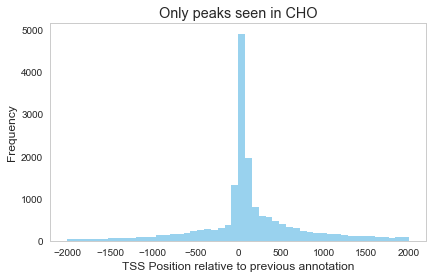

In [9]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_CHO.png",bbox_inches='tight')

## -1kb:+1kb

In [10]:
txn_pd = pickle.load(open("Results/txn_df_1kb_1kb.p",'rb'))

In [11]:
anno_peaks = pd.read_csv('Results/peaks_with_tss_and_gene.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

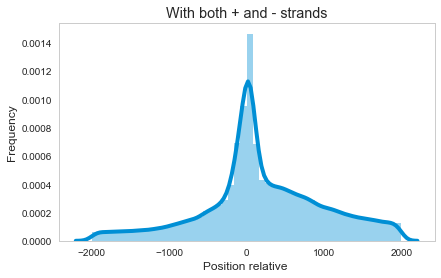

In [12]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')

plt.savefig("Results/Figures/Distance_to_TSS_neg_included_1kb_1kb.png")

In [23]:
sns.distplot?

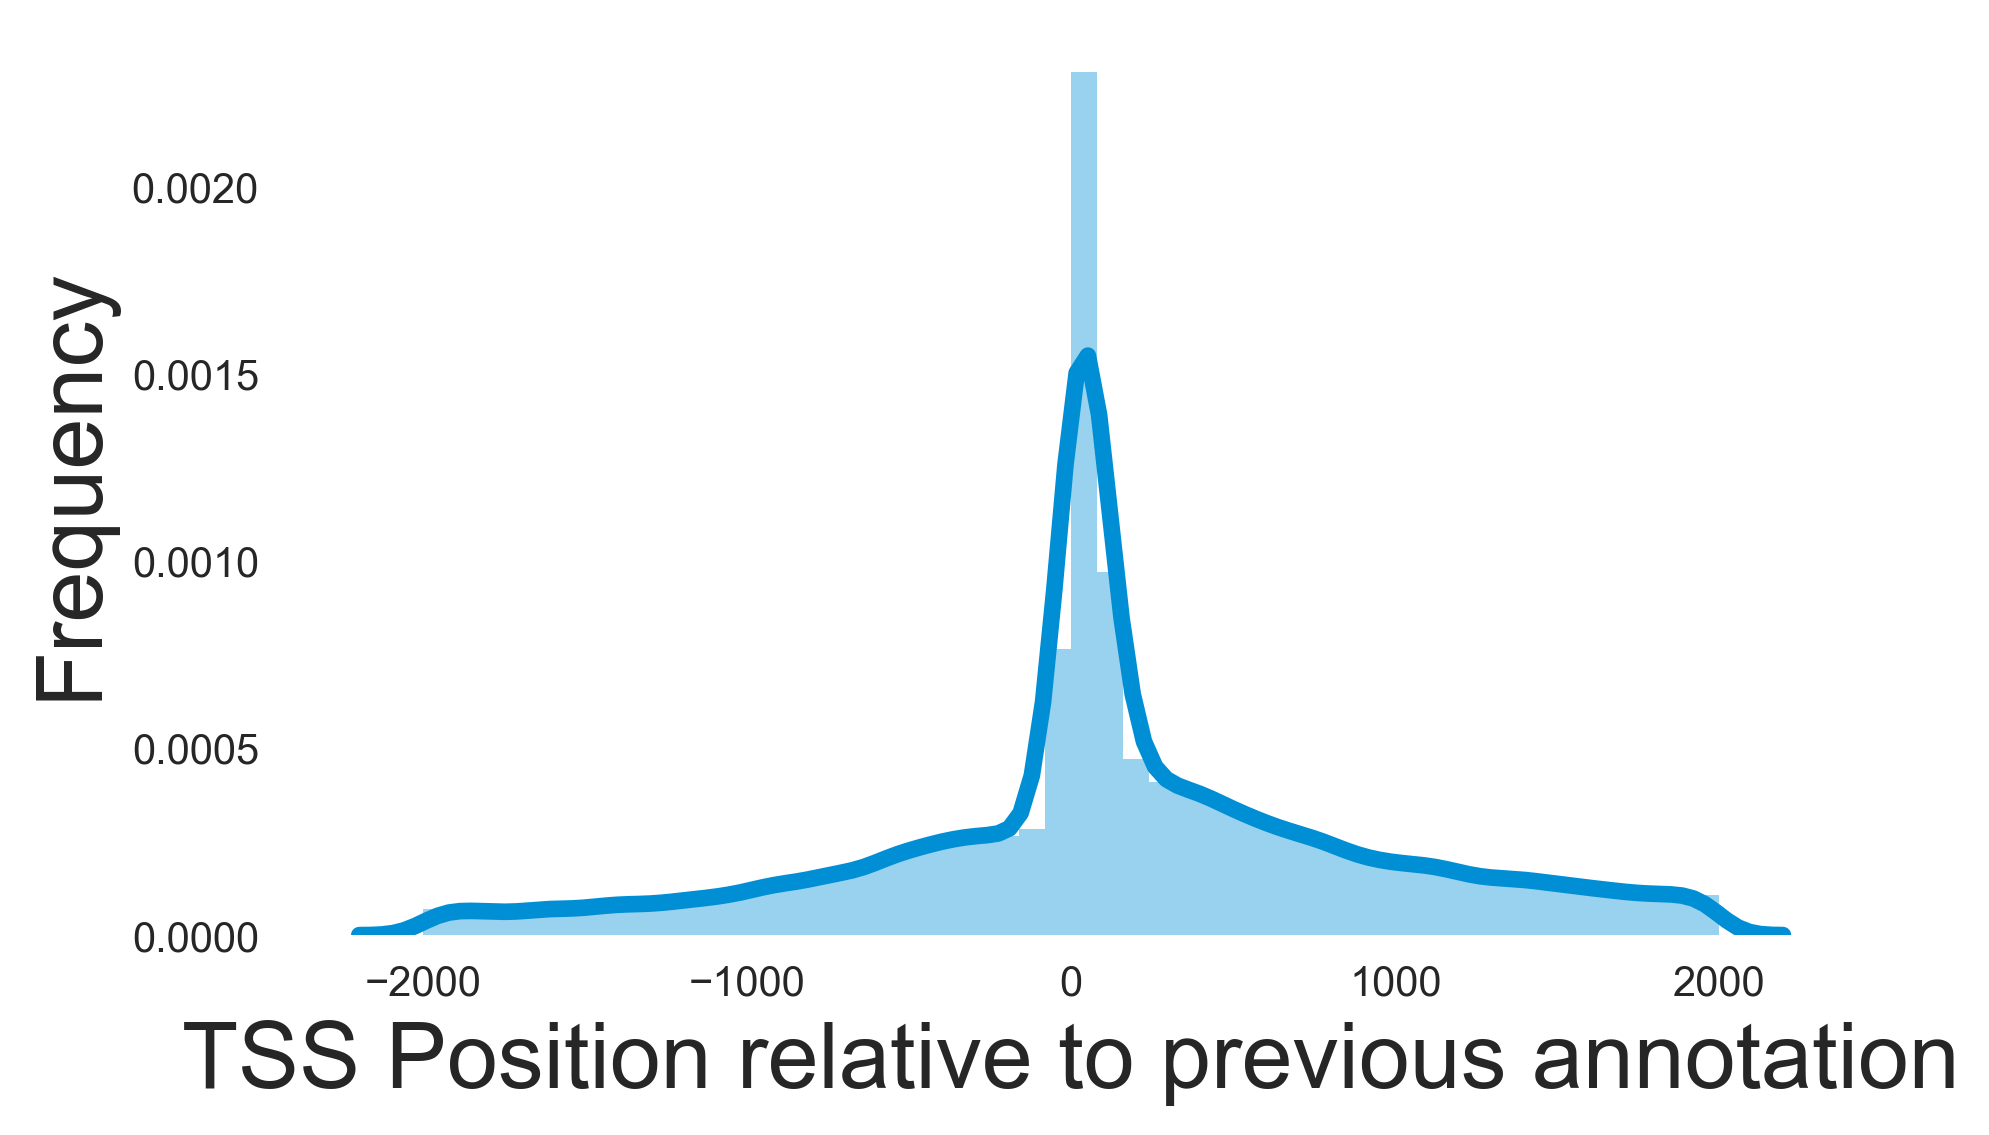

In [28]:
f = plt.figure(dpi=300)
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.png",bbox_inches='tight')

In [32]:
sns.distplot?

In [33]:
f.add_subplot?

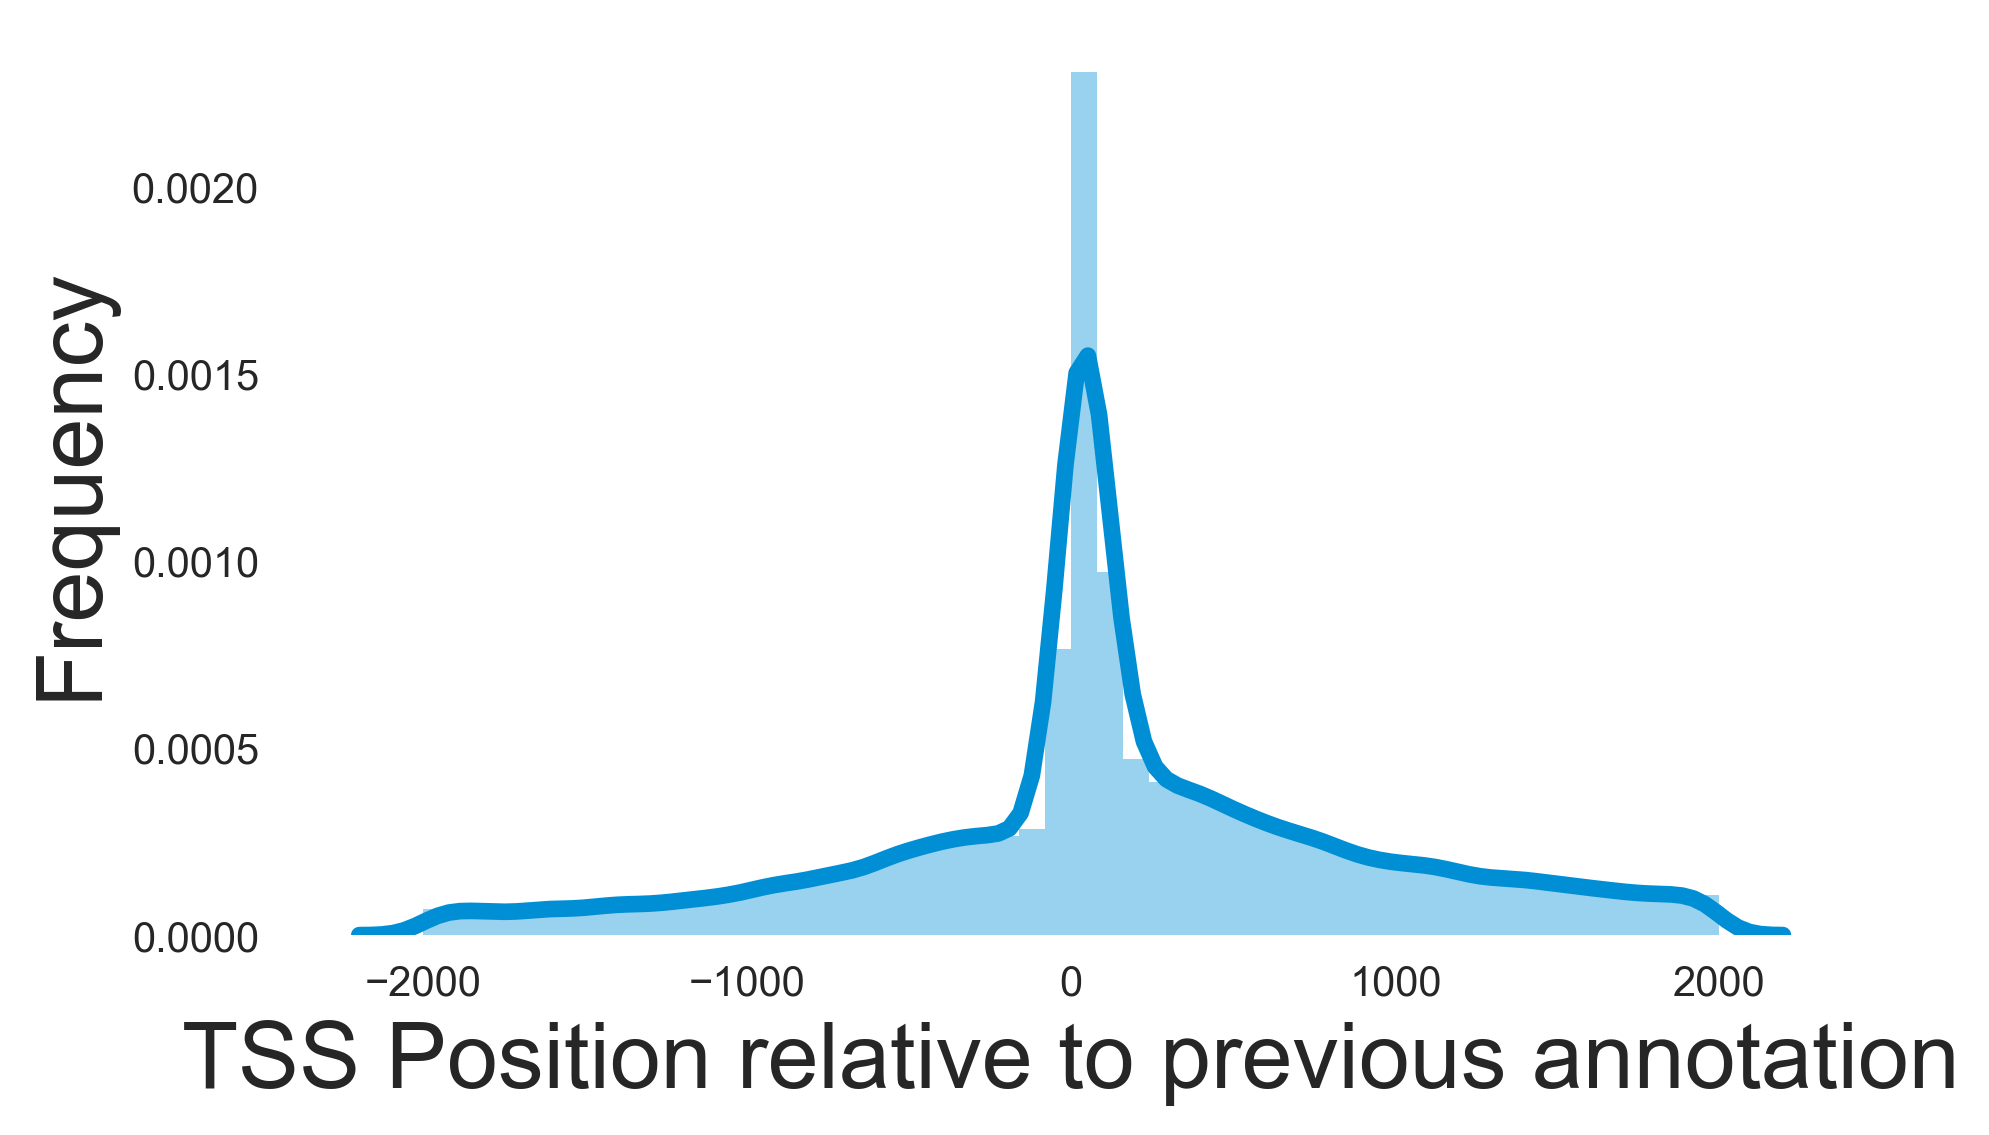

In [35]:
f = plt.figure(dpi=300)
ax = f.add_subplot()
sns.set_style("white")
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'],ax = ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.pdf",bbox_inches='tight')

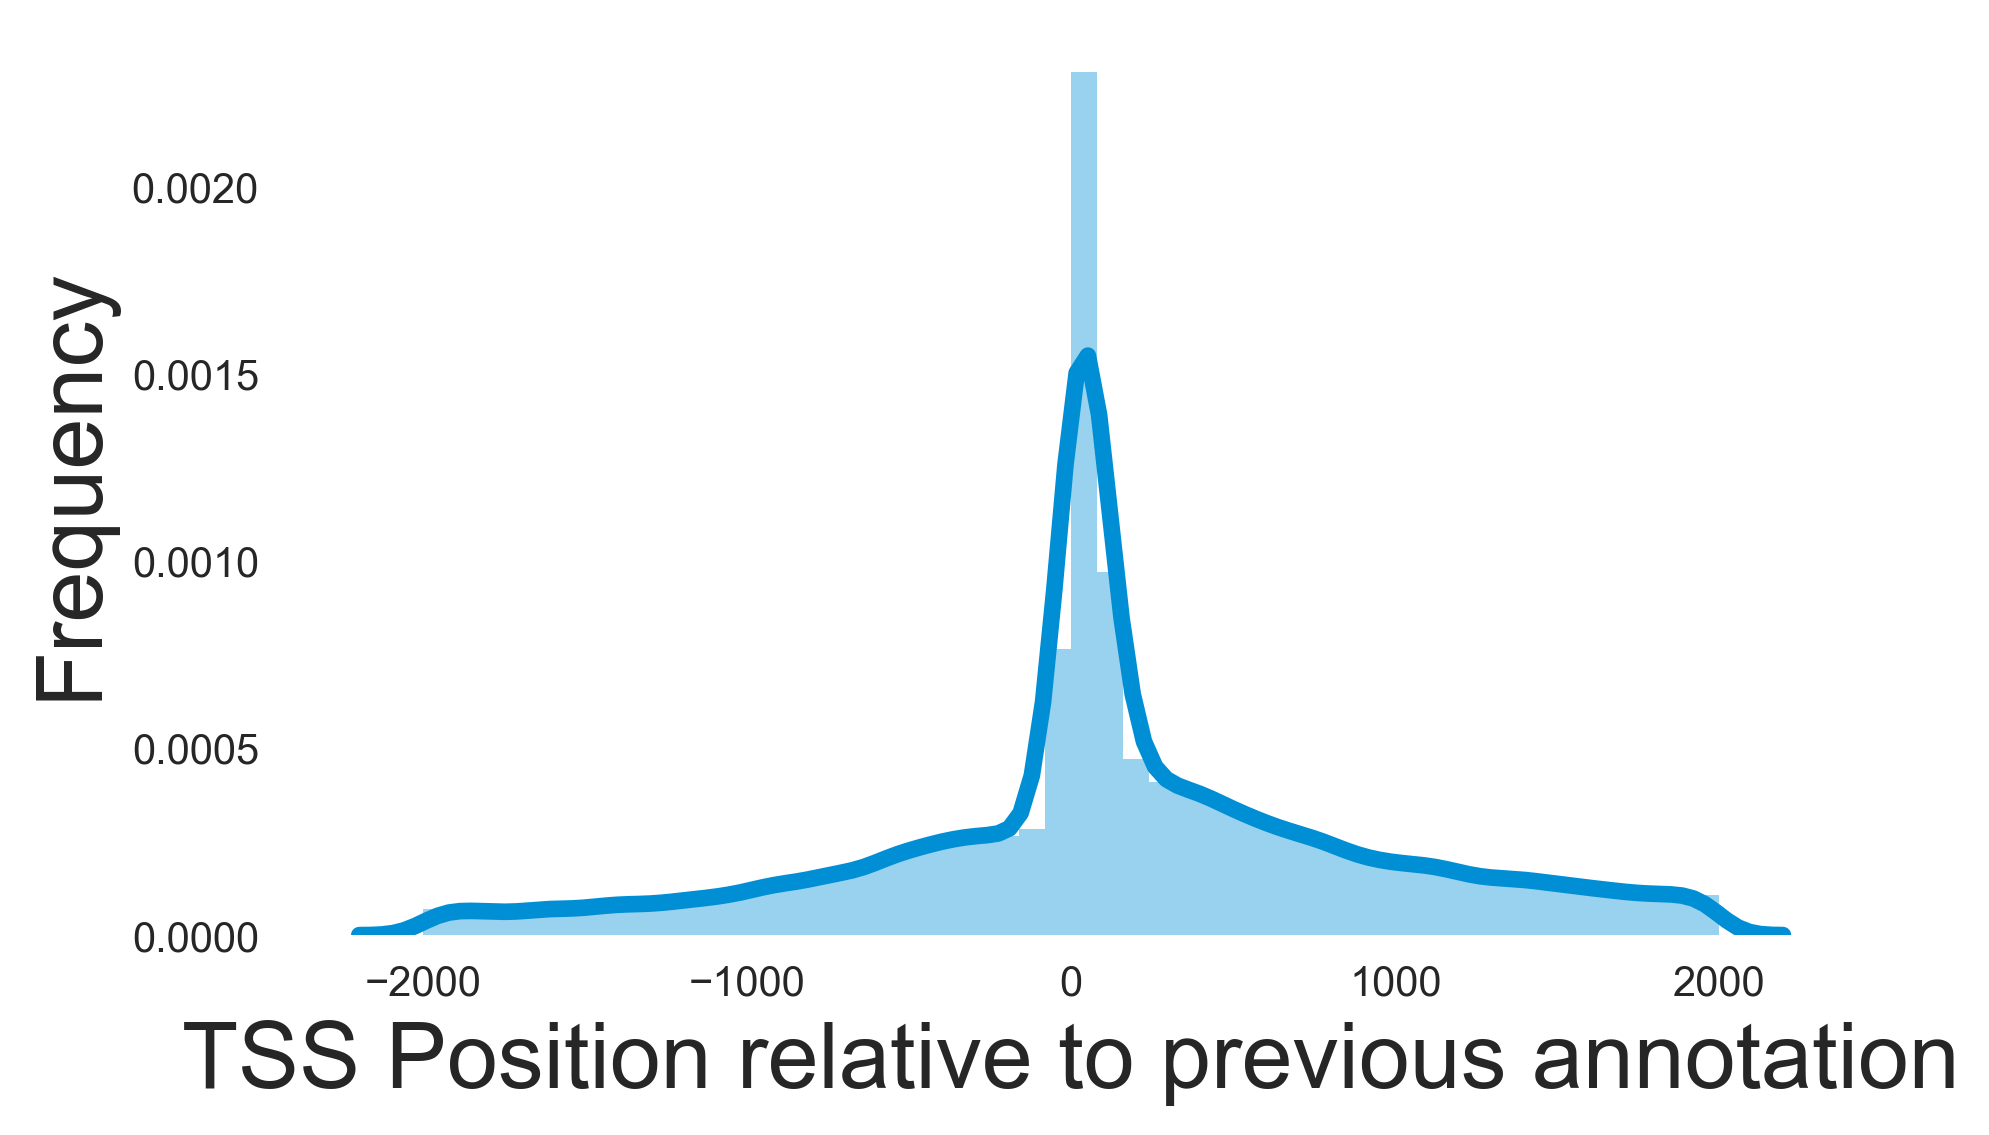

In [36]:
f = plt.figure(dpi=300)
ax = f.add_subplot()
sns.set_style("white")
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'],ax = ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.svg")

In [14]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 10))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

15672
(43862, 13)


In [15]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 100))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

23872
(43862, 13)


In [16]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 500))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

32072
(43862, 13)


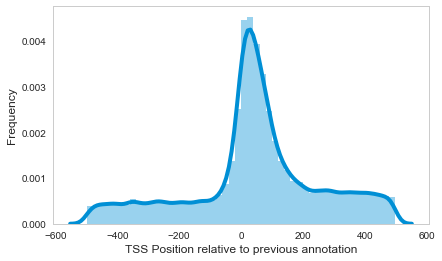

In [17]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_500_1kb_1kb.png",bbox_inches='tight')

### Look at ones only in CHO

In [18]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

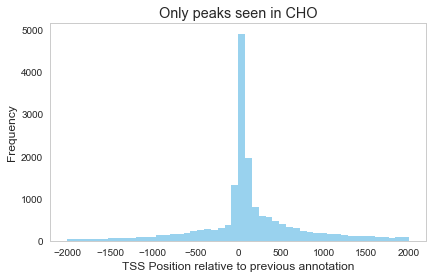

In [19]:
f = plt.figure(dpi=300)
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_CHO_1kb_1kb.png",bbox_inches='tight')